# Convolutional Neural Network on mnist dataset

#### MNIST dataset: mnist dataset is a dataset of handwritten images as shown below in image.

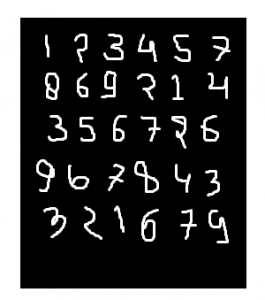

#### Source: https://www.geeksforgeeks.org/applying-convolutional-neural-network-on-mnist-dataset/

#### Libraries required

In [3]:
import numpy as np 
import keras 
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten 
from keras import backend as k 

#### Create the train data and test data

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

#### Checking data-format: ‘channels_first’ or ‘channels_last’. 

In [25]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first': 
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) 
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 
    inpx = (1, img_rows, img_cols) 

else: 
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
    inpx = (img_rows, img_cols, 1) 
#Type change
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
#Normalize data
x_train /= 255 
x_test /= 255

#### Description of the output classes

In [20]:
y_train = keras.utils.to_categorical(y_train) 
y_test = keras.utils.to_categorical(y_test) 

#### CNN model

In [22]:
inpx = Input(shape=inpx) 
#Layer 1: convolves the image using 32 filters each of size (3*3)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx) 
#Layer 2: convolve the image and is using 64 filters each of size (3*3)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1) 
#Layer 3: MaxPooling2D layer which picks the max value out of a matrix of size (3*3)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2) 
#Layer 4: Dropout at a rate of 0.5
layer4 = Dropout(0.5)(layer3) 
#Layer 5: flattening the output obtained from layer4 and this flatten output is passed to layer6
layer5 = Flatten()(layer4) 
#Layer 6: hidden layer of neural network containng 250 neurons
layer6 = Dense(250, activation='sigmoid')(layer5) 
#Layer 7: output layer having 10 neurons for 10 classes of output that is using the softmax function
layer7 = Dense(10, activation='softmax')(layer6) 

#### Calling compile and fit function

In [23]:
model = Model([inpx], layer7) 
model.compile(optimizer=keras.optimizers.Adadelta(), 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy']) 

model.fit(x_train, y_train, epochs=12, batch_size=500) 

Epoch 1/12
120/120 [==============================] - 86s 713ms/step - loss: 2.9404 - accuracy: 0.0968
Epoch 2/12
120/120 [==============================] - 92s 765ms/step - loss: 2.9190 - accuracy: 0.0976
Epoch 3/12
120/120 [==============================] - 80s 670ms/step - loss: 2.8881 - accuracy: 0.0998
Epoch 4/12
120/120 [==============================] - 80s 666ms/step - loss: 2.8688 - accuracy: 0.0965
Epoch 5/12
120/120 [==============================] - 83s 695ms/step - loss: 2.8430 - accuracy: 0.0975
Epoch 6/12
120/120 [==============================] - 83s 688ms/step - loss: 2.8138 - accuracy: 0.0986
Epoch 7/12
120/120 [==============================] - 79s 658ms/step - loss: 2.7832 - accuracy: 0.0991
Epoch 8/12
120/120 [==============================] - 80s 665ms/step - loss: 2.7501 - accuracy: 0.1000
Epoch 9/12
120/120 [==============================] - 79s 657ms/step - loss: 2.7331 - accuracy: 0.0976
Epoch 10/12
120/120 [==============================] - 80s 662ms/step - l

#### Evaluate function

In [24]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('loss=', score[0]) 
print('accuracy=', score[1]) 

loss= 2.633737802505493
accuracy= 0.09799999743700027
